<a href="https://colab.research.google.com/github/Jayakrish-MK/Jayakrish-MK/blob/main/Workation_Trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [2]:
# import the required libraries...

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 100)


In [5]:
# /content/Train.csv

train = pd.read_csv("/content/Train.csv")

#/content/Test.csv
test = pd.read_csv("/content/Test.csv")
train.head(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0


In [7]:
# combined the train and test set

combined = pd.concat([train, test],ignore_index=True)
train.shape, test.shape, combined.shape


((21000, 15), (9000, 14), (30000, 15))

In [8]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

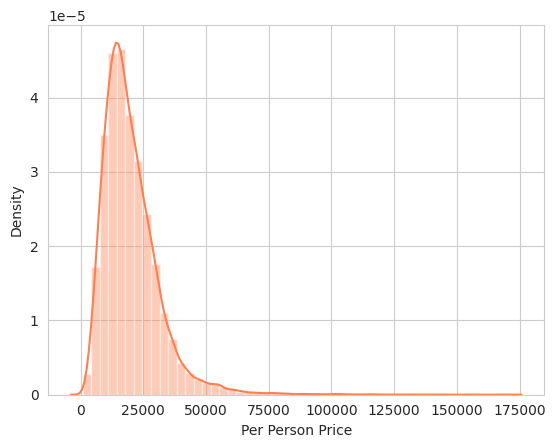

In [10]:
# let's check the target variable

sns.distplot(combined["Per Person Price"],color="coral")
plt.show()

In [14]:
len(combined["Places Covered"][0].split("|"))

4

In [16]:
# count of places visited
places = []

for i in combined["Places Covered"]:
  places.append(len(i.split("|")))

In [17]:
combined["Count_Places"] = pd.Series(places)

In [20]:
# sight seeing places covered

sights = []

for i in combined["Sightseeing Places Covered"]:
  sights.append(len(i.split("|")))

In [21]:
combined["Count_SS"] = pd.Series(sights)

In [23]:
flights = []

for i in combined["Airline"]:
  flights.append(len(i.split("|")))

In [24]:
combined["Count_Flights"] = pd.Series(flights)

In [26]:
# convert Travel Date from Object to Date Time

combined["Travel Date"] = pd.to_datetime(combined["Travel Date"])

In [29]:
# Extract the Date, Month, Year

combined["Date"] = combined["Travel Date"].dt.day
combined["Month"] = combined["Travel Date"].dt.month
combined["Year"] = combined["Travel Date"].dt.year

In [30]:
# Extract the pattern with the target variable

max_month = combined.groupby("Month")["Per Person Price"].max()


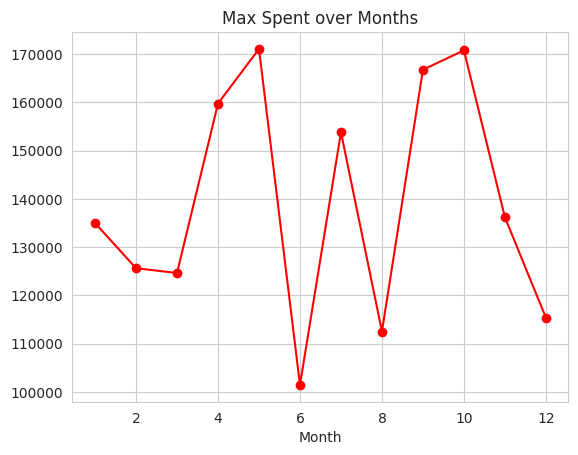

In [31]:
max_month.plot(kind="line",marker = "o", color="red")
plt.title("Max Spent over Months")
plt.show() # Peak Months ==>[4,5,7,9,10]

In [36]:
peak = [4,5,7,9,10]

def peaks(x):
  if x in peak:
    return ("peak Month")
  else:
    return ("Lean Month")

In [38]:
combined["Peak_Months"]=combined['Month'].apply(peaks)

In [40]:
max_days = combined.groupby("Date")["Per Person Price"].max()

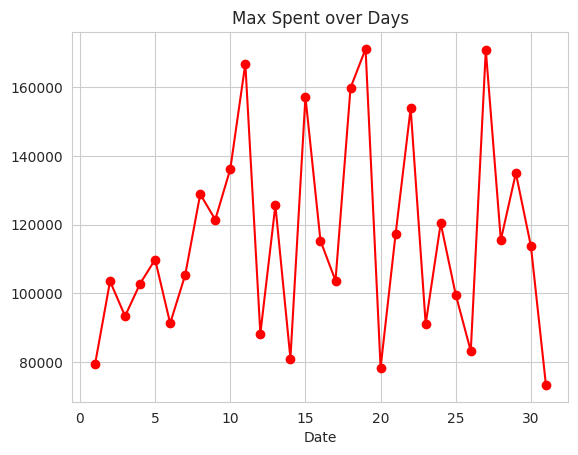

In [42]:
max_days.plot(kind="line",marker = "o", color="red")
plt.title("Max Spent over Days")
plt.show() # Peak Days ==>[2,4,5,7,8,10,11,13,15,18,19,21,22,24,27,29]

In [43]:
peak_days = [2,4,5,7,8,10,11,13,15,18,19,21,22,24,27,29]

combined["Peak_Days"]=combined.Date.apply(lambda x: "peak_days"
                    if x in peak_days else "Lean_days")

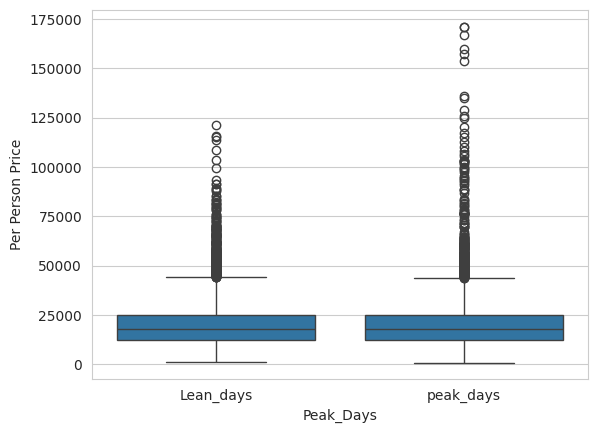

In [46]:
sns.boxplot(x="Peak_Days",y="Per Person Price",data=combined)
plt.show()

In [47]:
combined["Itinerary"][0].split(".")

['1N New Delhi ', ' 2N Shimla ', ' 2N Manali ', ' 1N Chandigarh']

In [48]:
combined["Hotel Details"][3] # \d\.\d

'Elixir Hills Suites Resort & Spa-MMT Holidays Special:4.6|The Zuri Kumarakom, Kerala Resort & Spa:4.6|Marari Beach - CGH Earth:4.3|Estuary Sarovar Portico:'

In [51]:
import re

locs="'1N New Delhi ', ' 2N Shimla ', ' 2N Manali ', ' 1N Chandigarh'"
pd.to_numeric(re.findall(r"\d",locs))


array([1, 2, 2, 1])

In [53]:
combined["Duration"] = combined['Itinerary'].apply(lambda \
                            x:np.sum(pd.to_numeric(re.findall("\d",x))))

In [61]:
# extract ratings

text = "Elixir Hills Suites Resort & Spa-MMT Holidays Special:4.6|The Zuri Kumarakom, Kerala Resort & Spa:4.6|Marari Beach - CGH Earth:4.3|Estuary Sarovar Portico:"

np.mean(pd.to_numeric(re.findall("\d\.\d",text)))

4.5

In [60]:
combined["Ratings"]=combined["Hotel Details"].apply(lambda
                                                    x: np.mean(pd.to_numeric(re.findall("\d\.\d",x))))

In [62]:
# Missing value in Ratings

combined.Ratings.fillna(combined.Ratings.median(),inplace=True)

In [66]:
newdata = combined.drop(["Uniq Id","Destination","Itinerary","Places Covered","Travel Date","Hotel Details",
               "Airline","Sightseeing Places Covered","Cancellation Rules","Date","Month"],axis=1)

In [67]:
newdata.head()

,Package Name,Package Type,Start City,Flight Stops,Meals,Per Person Price,Count_Places,Count_SS,Count_Flights,Year,Peak_Months,Peak_Days,Duration,Ratings
0,Best of Shimla and Manali Holiday from Delhi,Standard,Mumbai,2,3,11509.0,4,1,1,2021,peak Month,Lean_days,6,4.100000
1,Kashmir Valley vacation,Premium,New Delhi,0,5,22485.5,3,7,2,2021,Lean Month,peak_days,4,4.433333
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,New Delhi,0,4,12421.5,2,8,1,2021,peak Month,Lean_days,3,4.400000
3,Colorful Kerala ( Romantic Getaway ),Premium,New Delhi,0,5,35967.0,4,9,1,2021,Lean Month,peak_days,6,4.500000
4,A Week In Bangkok & Pattaya,Premium,New Delhi,0,5,25584.0,2,2,2,2021,Lean Month,Lean_days,7,4.350000


In [68]:
newdata["Package Type"].unique()

array(['Standard', 'Premium', 'Luxury', 'Deluxe', 'Budget'], dtype=object)

In [69]:
newdata.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [71]:
package = {"Budget":1, "Deluxe":5, "Luxury":2, "Premium":4,"Standard":3 }

newdata["Package Type"] = newdata["Package Type"].map(package)

In [80]:
# count of package type basis duration

newdata["PkgType_Duration_count"]=newdata.groupby("Package Type")["Duration"].transform("count")

newdata["PkgType_Duration_mean"]=newdata.groupby("Package Type")["Duration"].transform("mean")

newdata["PkgType_Duration_std"]=newdata.groupby("Package Type")["Duration"].transform("std")

# count of package name basis duration

newdata["PkgName_Duration_count"]=newdata.groupby("Package Name")["Duration"].transform("count")

In [83]:
newdata.columns

Index(['Package Name', 'Package Type', 'Start City', 'Flight Stops', 'Meals',
       'Per Person Price', 'Count_Places', 'Count_SS', 'Count_Flights', 'Year',
       'Peak_Months', 'Peak_Days', 'Duration', 'Ratings',
       'PkgType_Duration_count', 'PkgType_Duration_mean',
       'PkgType_Duration_std', 'PkgName_Duration_count'],
      dtype='object')

In [84]:
newdata.drop(["Package Name","Package Type","Start City"],axis=1,inplace=True)

In [86]:
newdata["Year"]=newdata.Year.astype("object")

In [87]:
# categorical encoding
dummydata = pd.get_dummies(newdata,drop_first=True)
# Split the Data in Train and Test
newtrain = dummydata.loc[0:train.shape[0]-1,:]
newtest = dummydata.loc[train.shape[0]:,:]
train.shape, test.shape, newtrain.shape, newtest.shape
# Build The model

((21000, 15), (9000, 14), (21000, 15), (9000, 15))

In [88]:
# Dropping the target variable from the newtest

newtest.drop("Per Person Price",axis=1,inplace=True)

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

X = newtrain.drop("Per Person Price",axis=1)
y = newtrain["Per Person Price"]

gbm = GradientBoostingRegressor()
pred_gbm = gbm.fit(X,y).predict(newtest)

In [91]:
submission = pd.DataFrame({'Per Person Price': pred_gbm})
submission.to_csv('GBM.csv', index=False)